## Importing data

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
df1=pd.read_csv('mHealth_subject1.csv')
df2=pd.read_csv('mHealth_subject2.csv')
df3=pd.read_csv('mHealth_subject3.csv')
df4=pd.read_csv('mHealth_subject4.csv')
df5=pd.read_csv('mHealth_subject5.csv')
df6=pd.read_csv('mHealth_subject6.csv')
df7=pd.read_csv('mHealth_subject7.csv')
df8=pd.read_csv('mHealth_subject8.csv')
df9=pd.read_csv('mHealth_subject9.csv')
df10=pd.read_csv('mHealth_subject10.csv')

In [88]:
df1["subject"]=["subject1"]*len(df1)
df1=df1[:-1]
df2["subject"]=["subject2"]*len(df2)
df2=df2[:-1]
df3["subject"]=["subject3"]*len(df3)
df3=df3[:-1]
df4["subject"]=["subject4"]*len(df4)
df4=df4[:-1]
df5["subject"]=["subject5"]*len(df5)
df5=df5[:-1]
df6["subject"]=["subject6"]*len(df6)
df6=df6[:-1]
df7["subject"]=["subject7"]*len(df7)
df7=df7[:-1]
df8["subject"]=["subject8"]*len(df8)
df8=df8[:-1]
df9["subject"]=["subject9"]*len(df9)
df9=df9[:-1]
df10["subject"]=["subject10"]*len(df10)
df10=df10[:-1]

In [89]:
# Renaming acceleration and gyro columns
def renameAccelerationAndGyroColumns(df):
    df.rename(columns={
        'acceleration from the left-ankle sensor (X axis)':'alx',
        'acceleration from the left-ankle sensor (Y axis)':'aly',
        'acceleration from the left-ankle sensor (Z axis)':'alz',
        'gyro from the left-ankle sensor (X axis)':'glx',
        'gyro from the left-ankle sensor (Y axis)':'gly',
        'gyro from the left-ankle sensor (Z axis)':'glz',
        'acceleration from the right-lower-arm sensor (X axis)':'arx',
        'acceleration from the right-lower-arm sensor (Y axis)':'ary',
        'acceleration from the right-lower-arm sensor (Z axis)':'arz',
        'gyro from the right-lower-arm sensor (X axis)':'grx',
        'gyro from the right-lower-arm sensor (Y axis)':'gry',
        'gyro from the right-lower-arm sensor (Z axis)':'grz',
        'Label':'Activity'
    },inplace=True)
renameAccelerationAndGyroColumns(df1)
renameAccelerationAndGyroColumns(df2)
renameAccelerationAndGyroColumns(df3)
renameAccelerationAndGyroColumns(df4)
renameAccelerationAndGyroColumns(df5)
renameAccelerationAndGyroColumns(df6)
renameAccelerationAndGyroColumns(df7)
renameAccelerationAndGyroColumns(df8)
renameAccelerationAndGyroColumns(df9)
renameAccelerationAndGyroColumns(df10)

In [91]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],ignore_index=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count    Dtype  
---  ------                                                 --------------    -----  
 0   acceleration from the chest sensor (X axis)            1215745 non-null  float64
 1   acceleration from the chest sensor (Y axis)            1215745 non-null  float64
 2   acceleration from the chest sensor (Z axis)            1215745 non-null  float64
 3   electrocardiogram signal (lead 1)                      1215745 non-null  float64
 4   electrocardiogram signal (lead 2)                      1215745 non-null  float64
 5   alx                                                    1215745 non-null  float64
 6   aly                                                    1215745 non-null  float64
 7   alz                                                    1215745 non-null  float64
 8   glx                   

In [93]:
df.Activity.value_counts()

0.0     872550
1.0      30720
2.0      30720
3.0      30720
4.0      30720
9.0      30720
10.0     30720
11.0     30720
5.0      30720
7.0      29441
8.0      29337
6.0      28315
12.0     10342
Name: Activity, dtype: int64

The data is highly inbalanced so resampling it.

In [94]:
from sklearn.utils import resample
df_majority=df[df.Activity==0]
df_minorities=df[df.Activity!=0]
df_majority_downsampled=resample(df_majority,n_samples=30000,random_state=42)
df=pd.concat([df_majority_downsampled,df_minorities])
df.Activity.value_counts()

1.0     30720
2.0     30720
3.0     30720
4.0     30720
9.0     30720
10.0    30720
11.0    30720
5.0     30720
0.0     30000
7.0     29441
8.0     29337
6.0     28315
12.0    10342
Name: Activity, dtype: int64

In [95]:
df.isnull().sum()

acceleration from the chest sensor (X axis)              0
acceleration from the chest sensor (Y axis)              0
acceleration from the chest sensor (Z axis)              0
electrocardiogram signal (lead 1)                        0
electrocardiogram signal (lead 2)                        0
alx                                                      0
aly                                                      0
alz                                                      0
glx                                                      0
gly                                                      0
glz                                                      0
magnetometer from the left-ankle sensor (X axis)         0
magnetometer from the left-ankle sensor (Y axis)         0
magnetometer from the left-ankle sensor (Z axis)         0
arx                                                      0
ary                                                      0
arz                                                     

No null values.

In [96]:
#Dropping duplicates
df=df.drop(df[df.duplicated(keep='first')].index,axis=0)

In [97]:
df.Activity.value_counts()

1.0     30720
2.0     30720
3.0     30720
4.0     30720
9.0     30720
10.0    30720
11.0    30720
5.0     30720
7.0     29441
8.0     29337
0.0     29085
6.0     28315
12.0    10342
Name: Activity, dtype: int64

In [98]:
label_map={
    0:'Nothing',
    1:'Standing still',  
    2:'Sitting and relaxing', 
    3:'Lying down',  
    4:'Walking',  
    5:'Climbing stairs',  
    6:'Waist bends forward',
    7:'Frontal elevation of arms', 
    8:'Knees bending (crouching)', 
    9:'Cycling', 
    10:'Jogging', 
    11:'Running', 
    12:'Jump front & back' 
}

In [99]:
#Defining functions to visualize comparisons.
def plot_comparison(data,metric='acceleration'):
    metric=metric[0].lower()
    data=data
    for i in range(0,13):
        plt.figure(figsize=(16,4))
        plt.subplot(1,2,1)
        plt.plot(data[data['Activity']==i].reset_index(drop=True)[metric+'lx'],alpha=.7,label=metric+'lx')
        plt.plot(data[data['Activity']==i].reset_index(drop=True)[metric+'ly'],color='red',alpha=.7,label=metric+'ly')
        plt.plot(data[ data['Activity']==i].reset_index(drop=True)[metric+'lz'],color='green',alpha=.7,label=metric+'lz')
        plt.title(f'{label_map[i]} - left-ankle')
        plt.legend()  
        plt.subplot(1,2,2)
        plt.plot(data[data['Activity']==i].reset_index(drop=True)[metric+'rx'],alpha=.7,label=metric+'rx')
        plt.plot(data[data['Activity']==i].reset_index(drop=True)[metric+'ry'],color='red',alpha=.7,label=metric+'ry')
        plt.plot(data[data['Activity']==i].reset_index(drop=True)[metric+'rz'],color='green',alpha=.7,label=metric+'rz')
        plt.title(f'{label_map[i]} - right-lower-arm')
        plt.legend() 
        plt.show()
        print()
        
def plot_category(data,cat):
    array=(data[cat].value_counts().sort_values(ascending=False)/len(data))*100
    plt.barh(array.index,width=array.values)
    for index,value in enumerate(array.values):
        plt.text(value+.5,index,s='{:.1f}%'.format(value))
    plt.show()

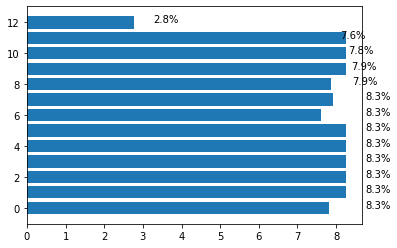

In [100]:
plot_category(df,'Activity')
plt.show()

Activity 12 has very less data points compare to rest of all.

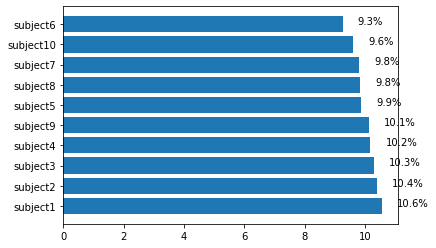

In [101]:
plot_category(df,'subject')

All subjects contributes almost equally.

## EDA of 1 subject data
checking data for 1 subject only

In [102]:
subject1=df[df['subject']=='subject1']
subject1.Activity.value_counts()

0.0     4177
8.0     3379
1.0     3072
2.0     3072
3.0     3072
4.0     3072
6.0     3072
7.0     3072
9.0     3072
10.0    3072
11.0    3072
5.0     3072
12.0    1075
Name: Activity, dtype: int64

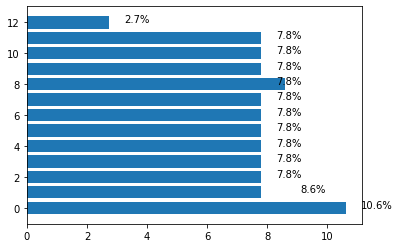

In [103]:
plot_category(subject1,'Activity')

Activity 12 has very less data points compare to rest of all as we have seen in full dataset.

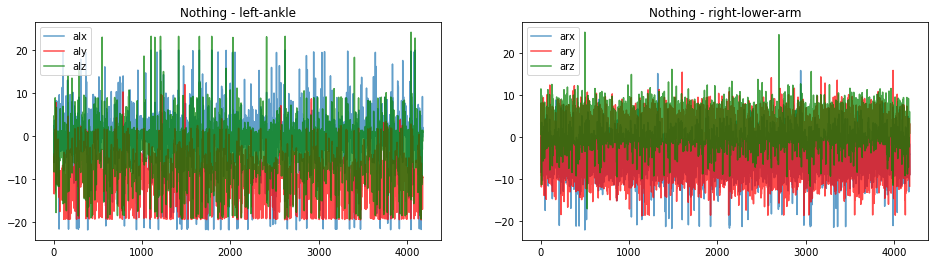

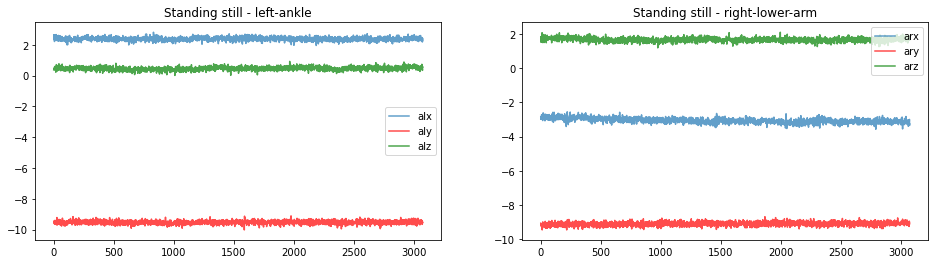

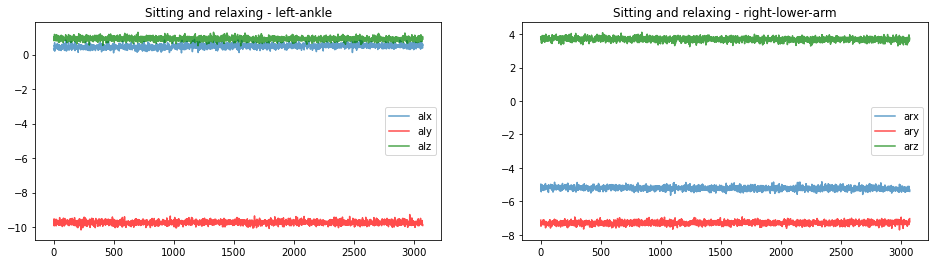

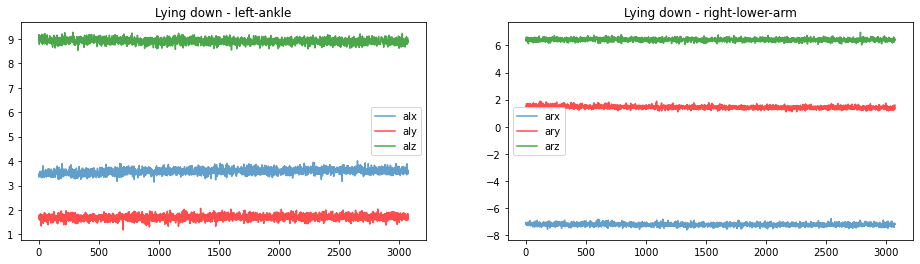

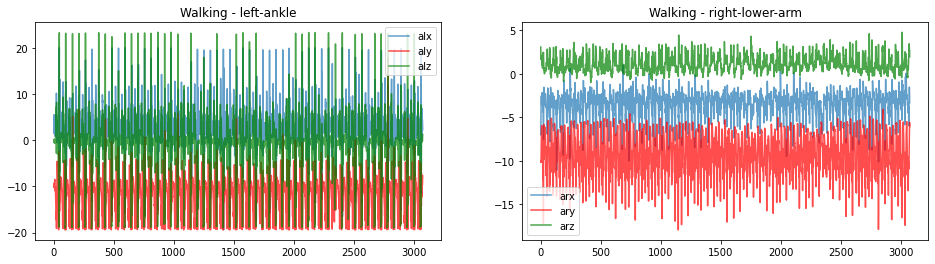

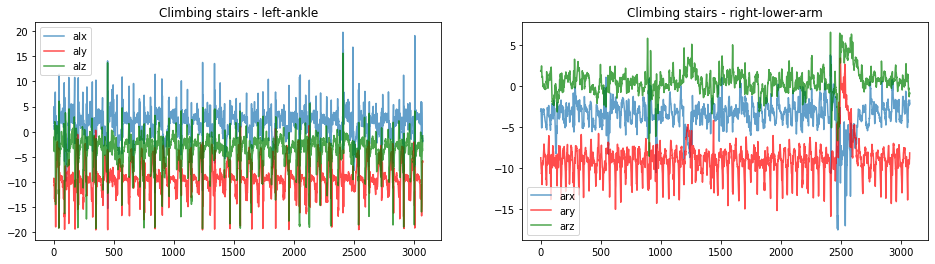

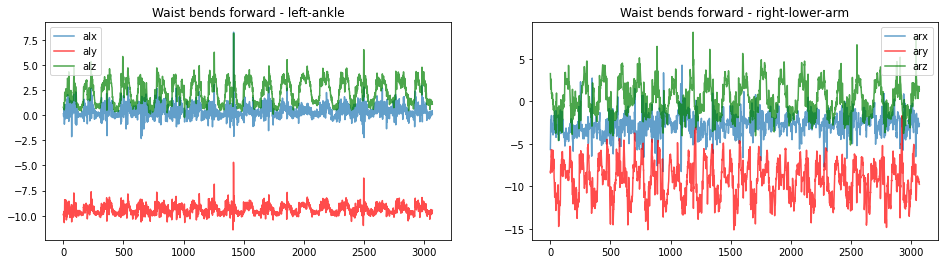

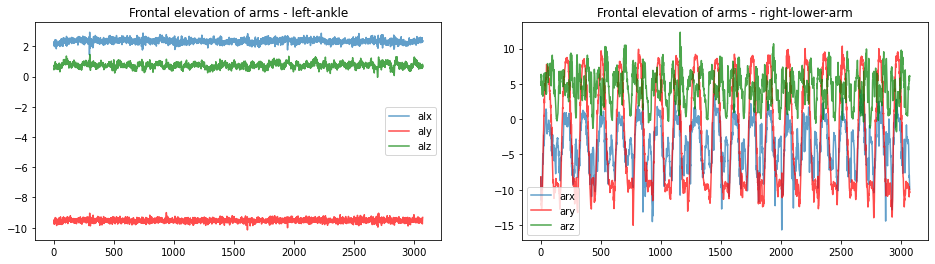

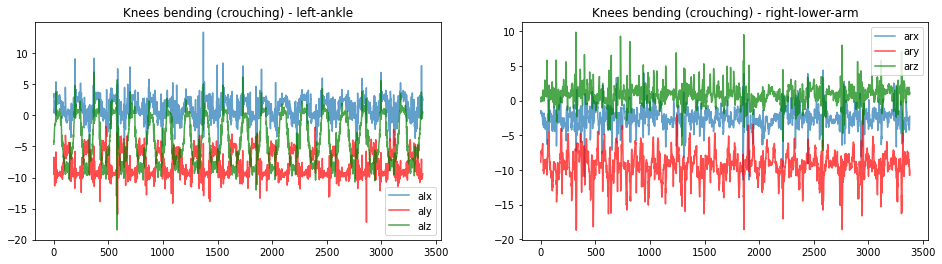

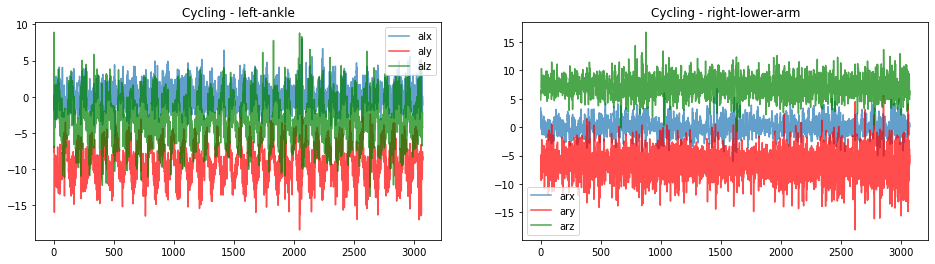

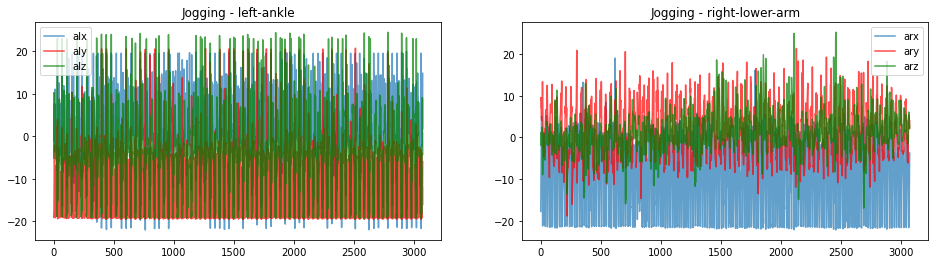

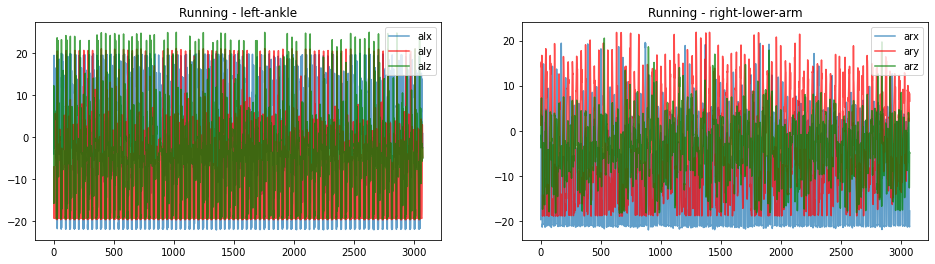

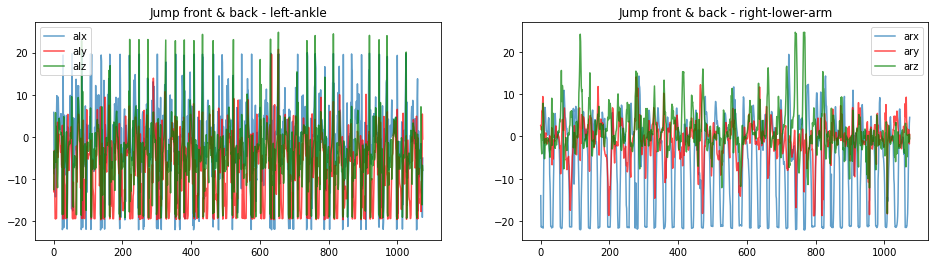

In [104]:
plot_comparison(subject1,'acceleration')

Clearly visible that static activites like sitting and lying down can be seperated from dynamic like cyclic and jumping.

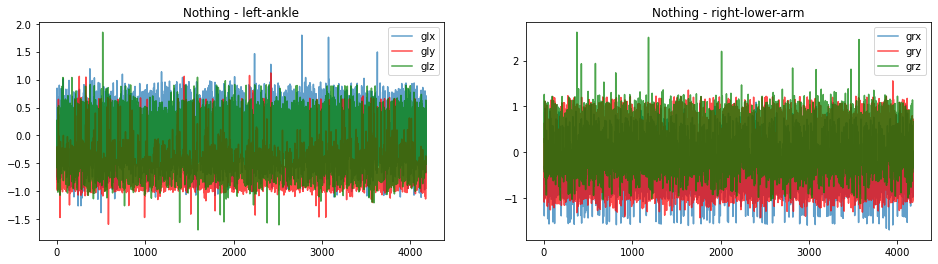

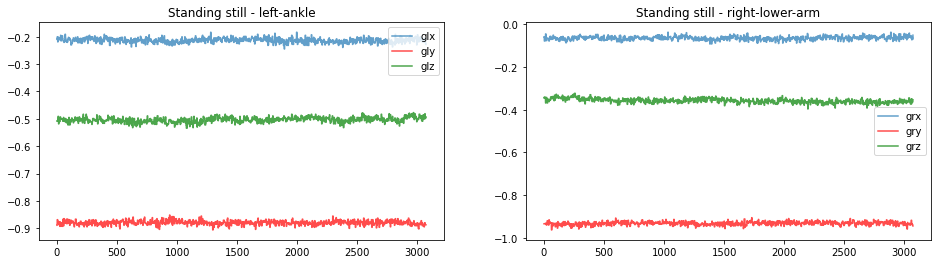

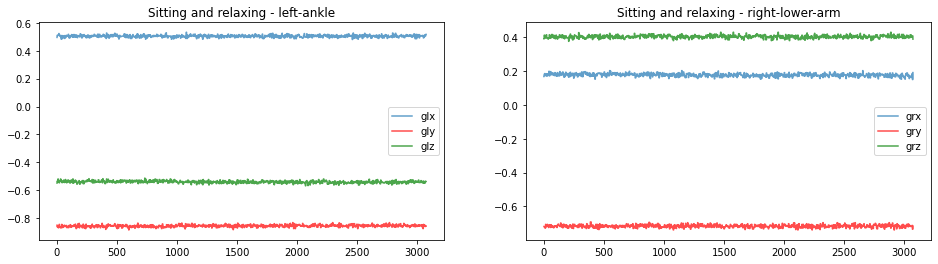

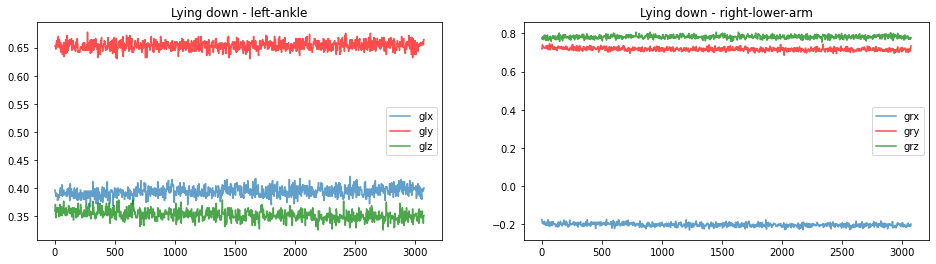

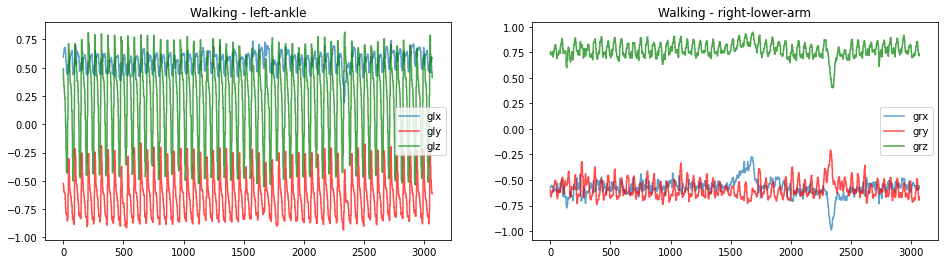

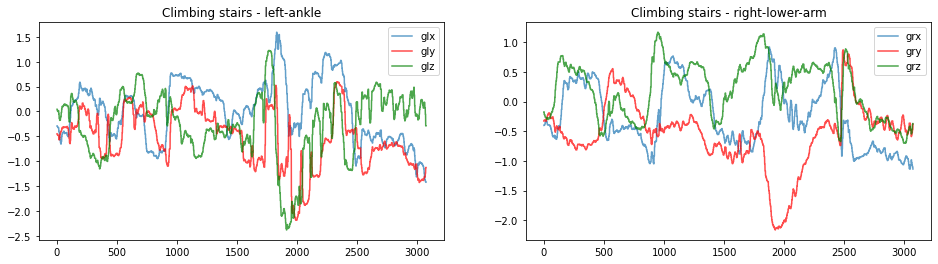

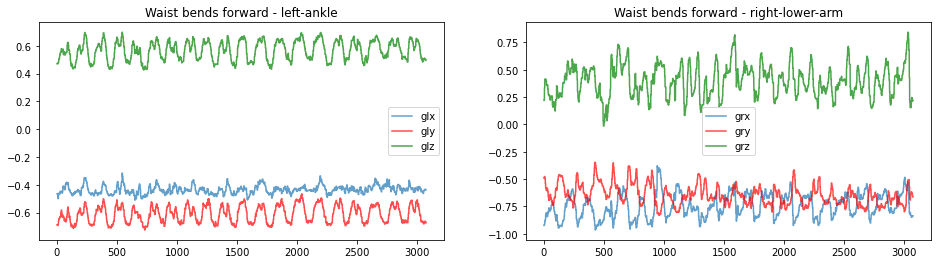

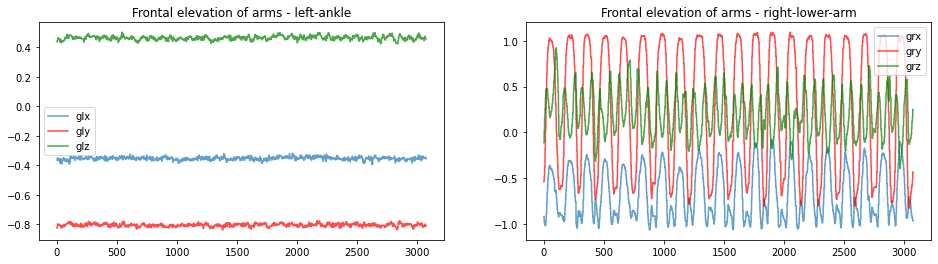

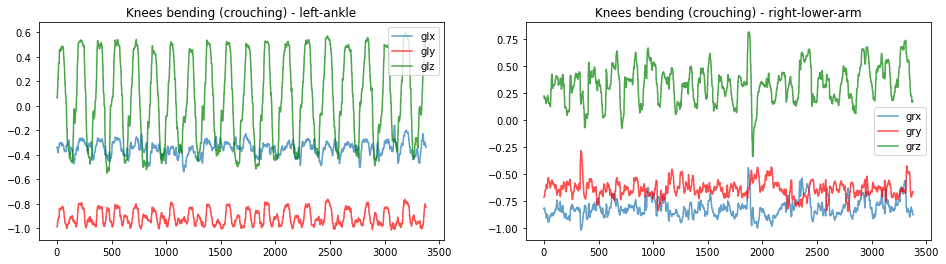

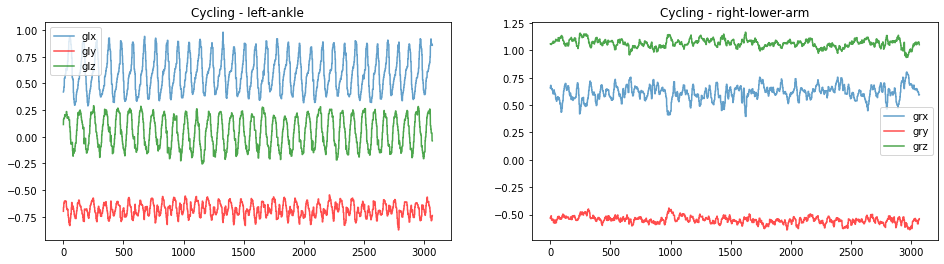

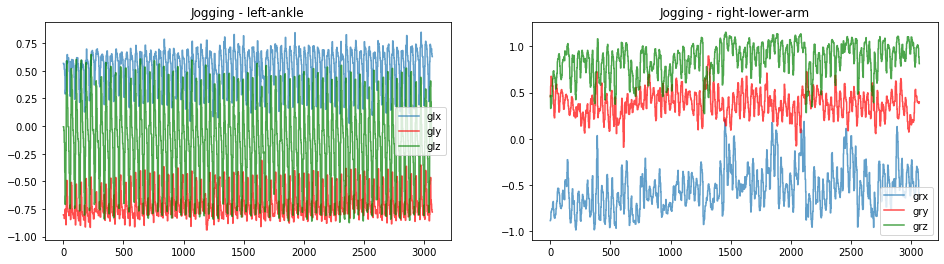

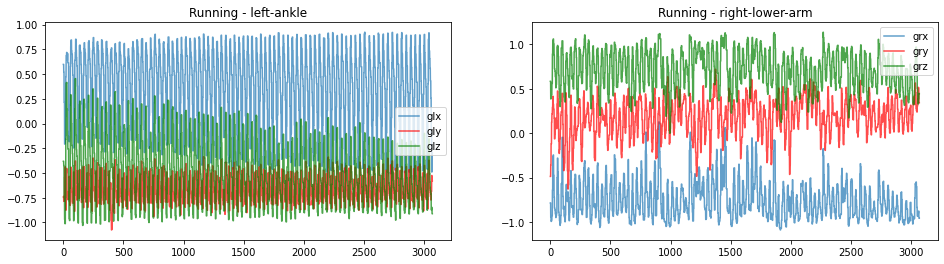

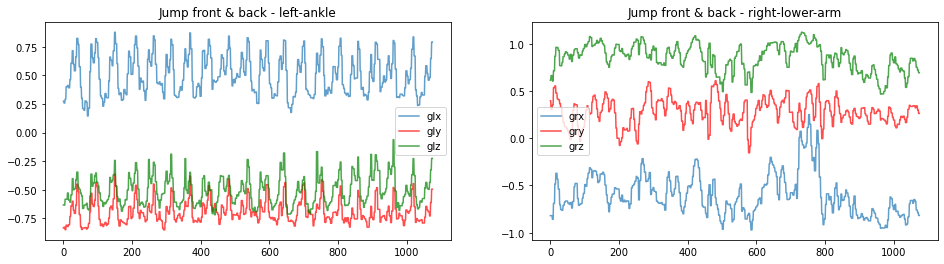

In [105]:
plot_comparison(subject1,'gyroscope')

Gyroscope data is much more clear,stable and follows a particular frequency cycle.

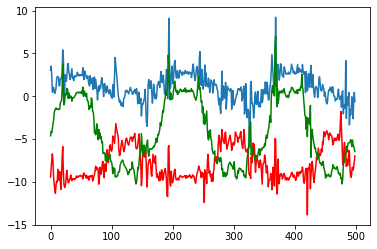

In [106]:
plt.plot(subject1[subject1.Activity==8].reset_index(drop=True).head(500)['alx'])
plt.plot(subject1[subject1.Activity==8].reset_index(drop=True).head(500)['aly'],color='red')
plt.plot(subject1[subject1.Activity==8].reset_index(drop=True).head(500)['alz'],color='green')

## EDA of Full Dataset

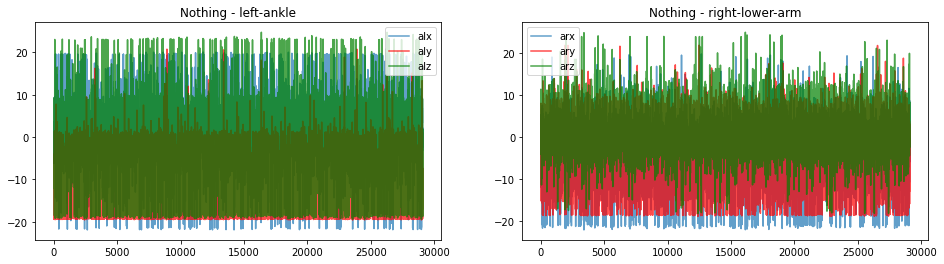

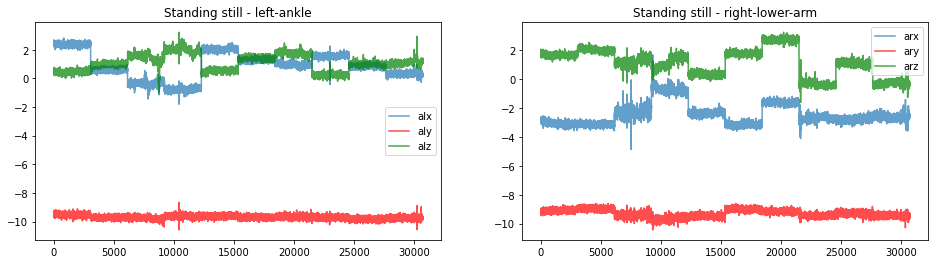

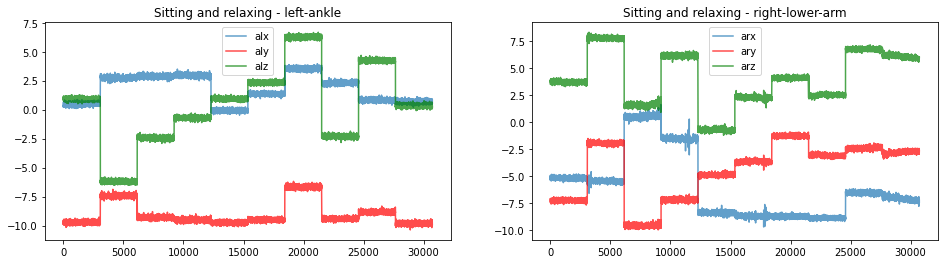

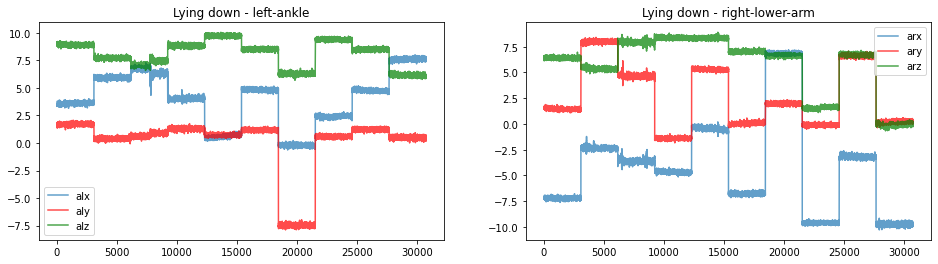

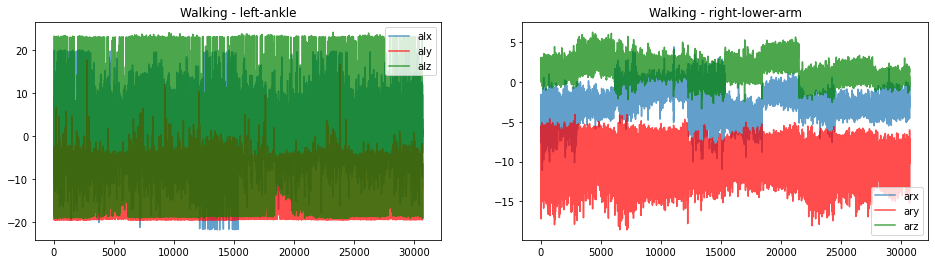

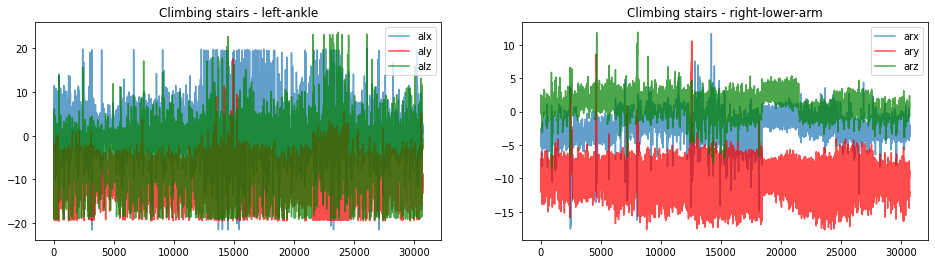

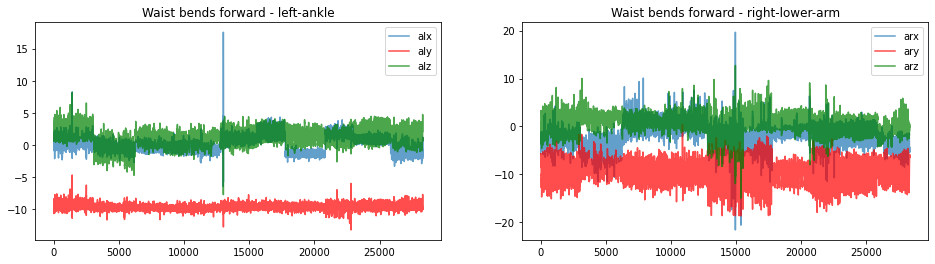

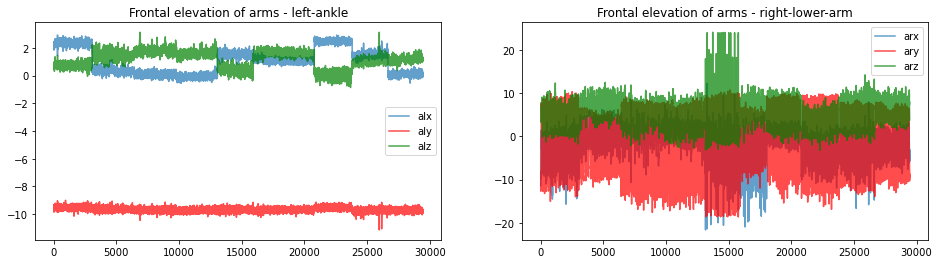

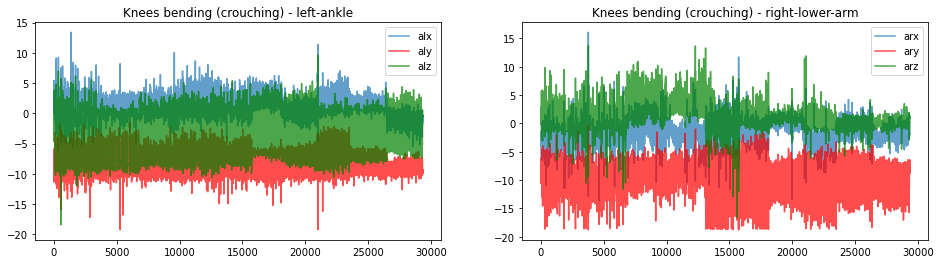

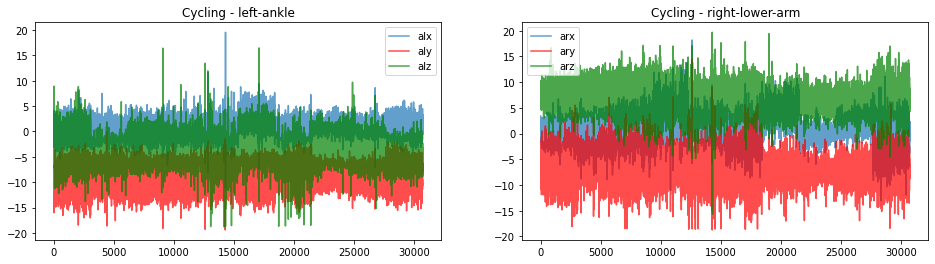

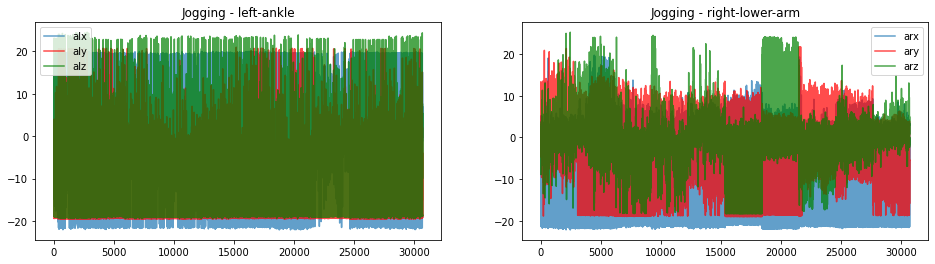

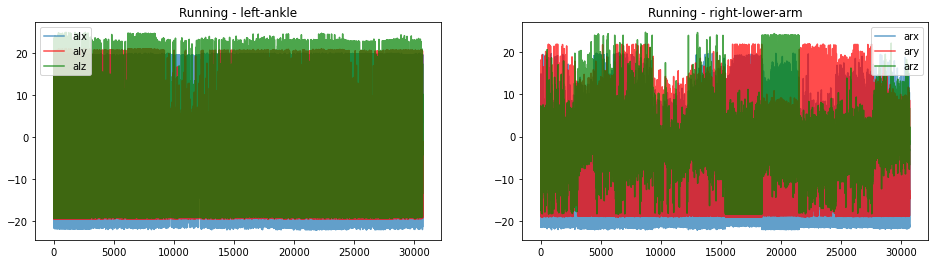

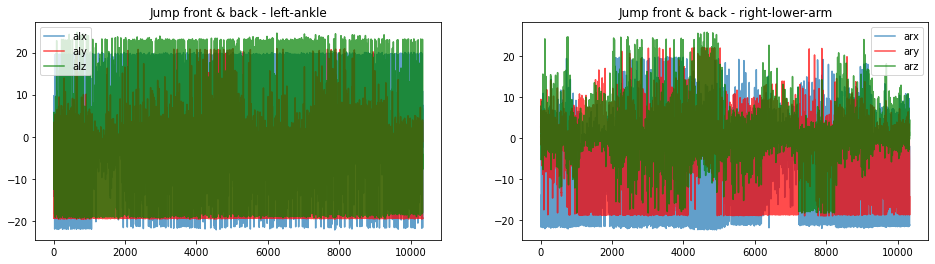

In [107]:
plot_comparison(df)

Again Static activites are more stable and can be seperated from dynamic activities easily.

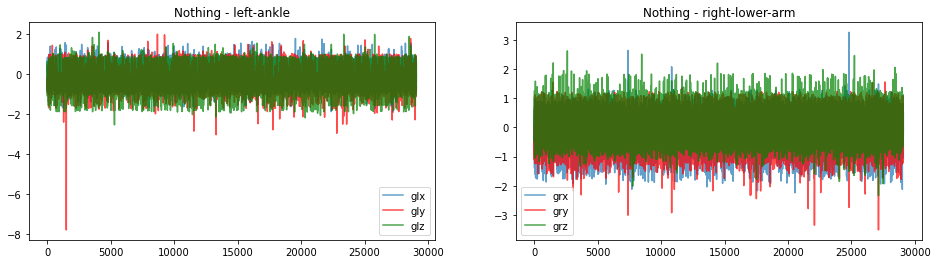

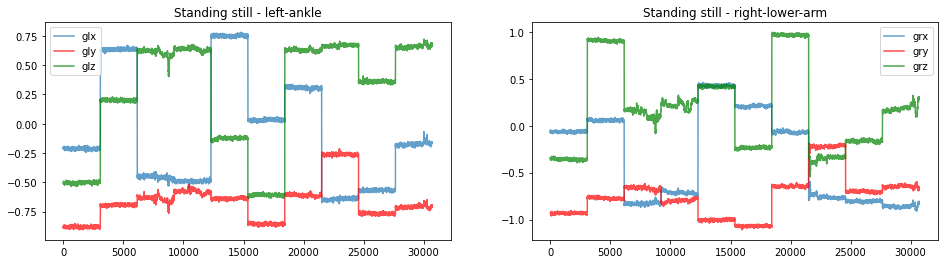

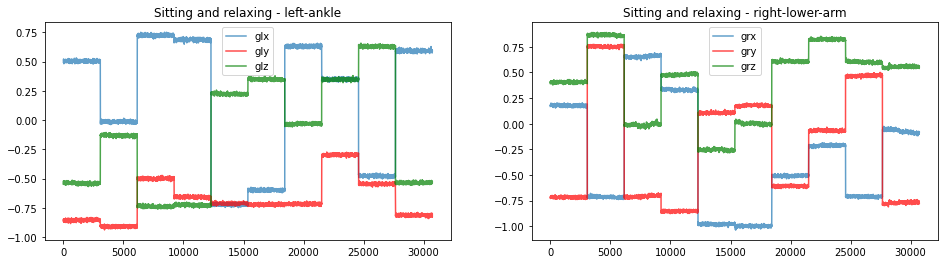

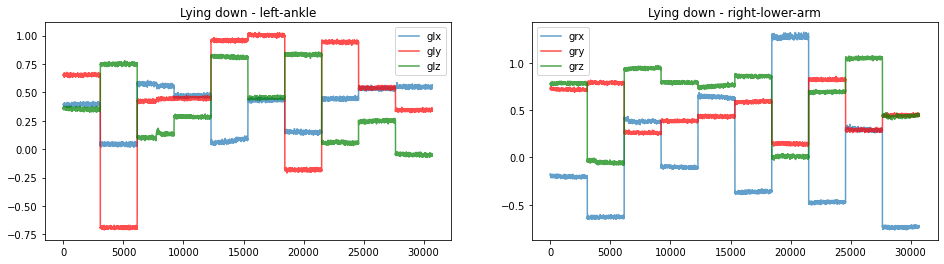

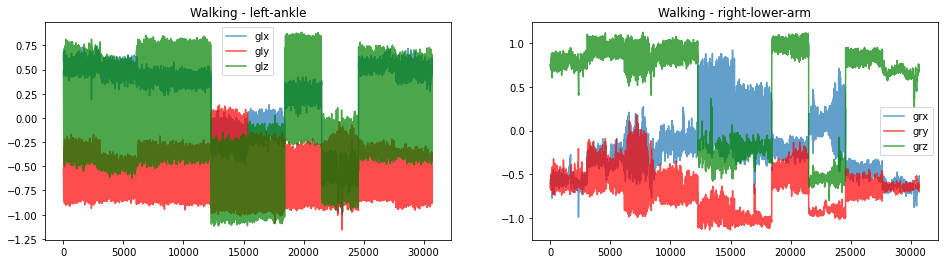

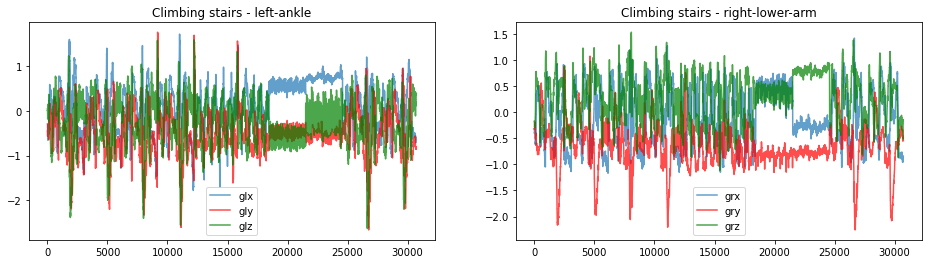

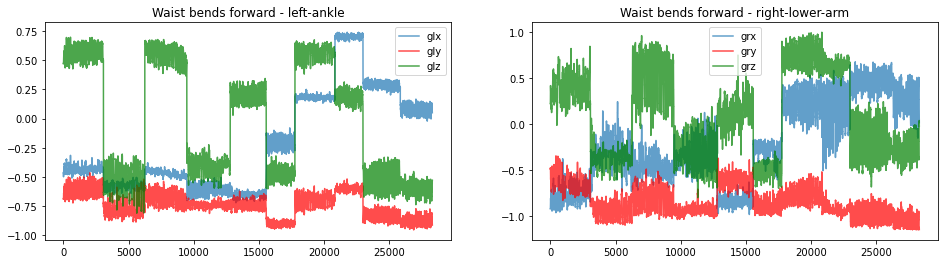

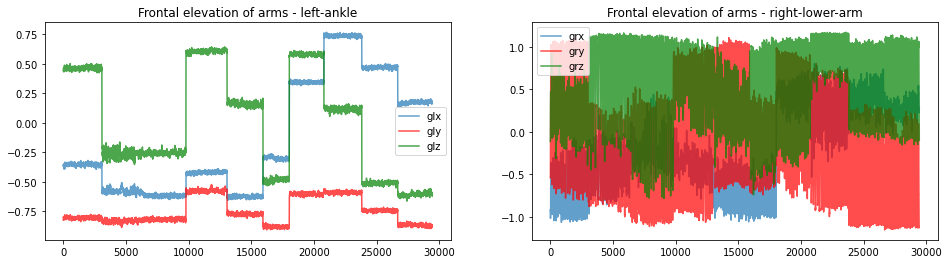

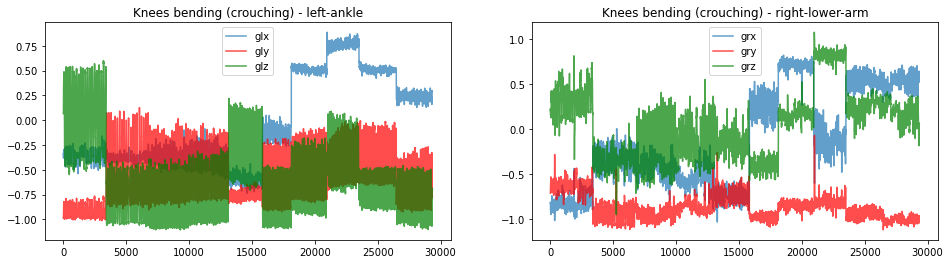

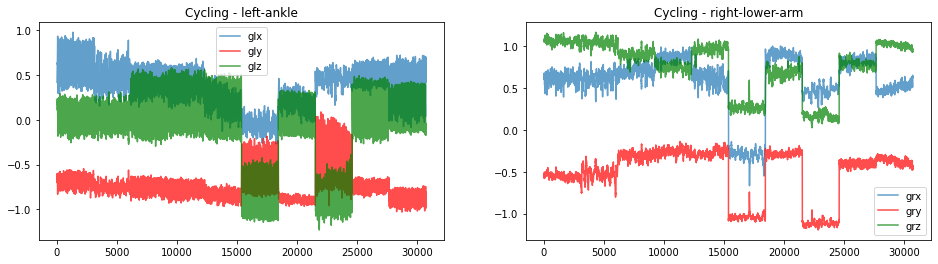

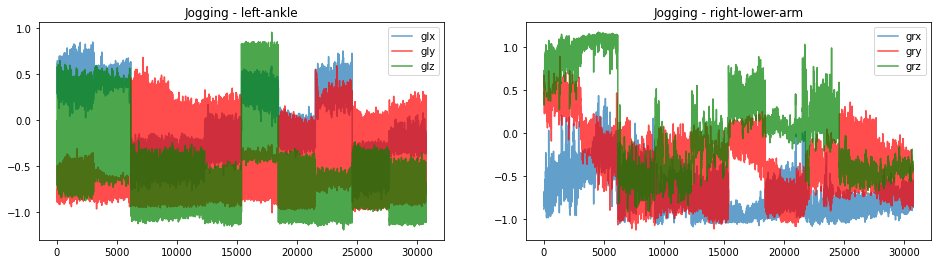

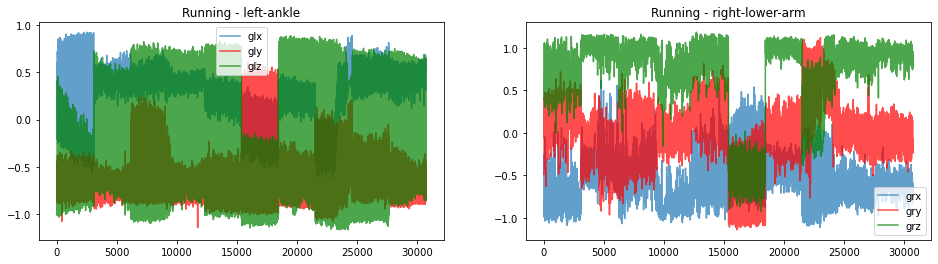

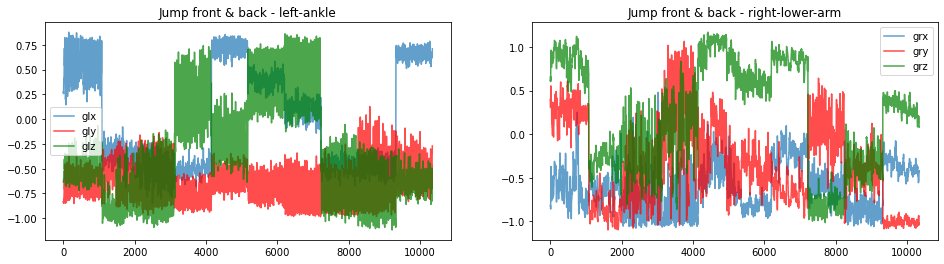

In [108]:
plot_comparison(df,'gyroscope')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<Figure size 576x432 with 0 Axes>

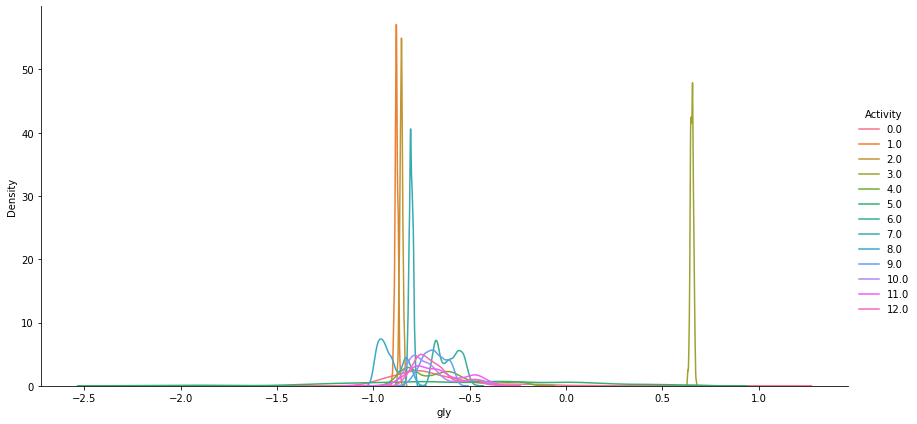

In [109]:
plt.figure(figsize=(8,6))
facetgrid=sns.FacetGrid(subject1,hue='Activity',height=6,aspect=2)
facetgrid.map(sns.distplot,'gly',hist=False).add_legend()
plt.show()

Some activities are clearly seperated out from others.

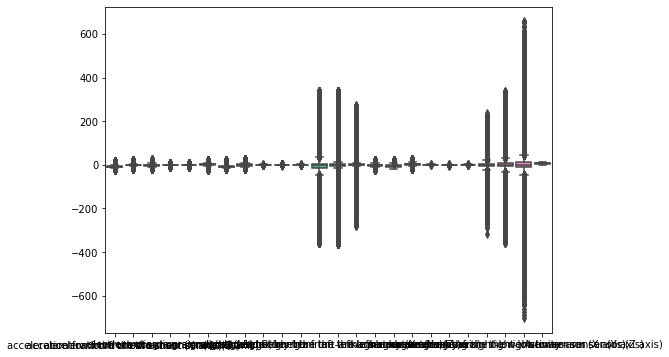

In [110]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

There are lots of outliers.

## Data Cleaning

In [112]:
df.describe().T

count      mean  \
acceleration from the chest sensor (X axis)         372280.0 -7.597461   
acceleration from the chest sensor (Y axis)         372280.0 -0.148349   
acceleration from the chest sensor (Z axis)         372280.0 -0.950721   
electrocardiogram signal (lead 1)                   372280.0  0.002473   
electrocardiogram signal (lead 2)                   372280.0 -0.007902   
alx                                                 372280.0  1.771027   
aly                                                 372280.0 -9.127639   
alz                                                 372280.0 -0.726089   
glx                                                 372280.0  0.090394   
gly                                                 372280.0 -0.557061   
glz                                                 372280.0 -0.125207   
magnetometer from the left-ankle sensor (X axis)    372280.0  0.319998   
magnetometer from the left-ankle sensor (Y axis)    372280.0 -1.747277   
magnetometer from the left-ankle sensor (Z axis)    372280.0 -0.435509   
arx                                                 372280.0 -3.477788   
ary                                                 372280.0 -5.784344   
arz                                                 372280.0  2.383474   
grx                                                 372280.0 -0.209329   
gry                                                 372280.0 -0.416437   
grz                                                 372280.0  0.368620   
magnetometer from the right-lower-arm sensor (X...  372280.0 -0.435902   
magnetometer from the right-lower-arm sensor (Y...  372280.0  1.329438   
magnetometer from the right-lower-arm sensor (Z...  372280.0  0.048110   
Activity                                            372280.0  5.687055   

                                                          std       min  \
acceleration from the chest sensor (X axis)          5.558066  -22.4380   
acceleration from the chest sensor (Y axis)          2.737086  -20.1880   
acceleration from the chest sensor (Z axis)          4.510567  -18.4010   
electrocardiogram signal (lead 1)                    0.829413   -8.6196   
electrocardiogram signal (lead 2)                    0.844502   -8.6196   
alx                                                  4.172418  -22.1460   
aly                                                  5.101975  -19.6190   
alz                                                  6.355493  -19.3730   
glx                                                  0.463281   -1.8942   
gly                                                  0.427508   -7.7899   
glz                                                  0.555029   -2.6267   
magnetometer from the left-ankle sensor (X axis)    75.175267 -357.5600   
magnetometer from the left-ankle sensor (Y axis)    46.919845 -364.5700   
magnetometer from the left-ankle sensor (Z axis)    18.750008 -282.3900   
arx                                                  5.780065  -22.3450   
ary                                                  6.493884  -18.9720   
arz                                                  4.147604  -18.2390   
grx                                                  0.547731   -2.2392   
gry                                                  0.547800   -3.5113   
grz                                                  0.522133   -2.3362   
magnetometer from the right-lower-arm sensor (X...  33.465258 -319.0300   
magnetometer from the right-lower-arm sensor (Y...  30.702272 -359.1200   
magnetometer from the right-lower-arm sensor (Z...  81.340931 -702.5700   
Activity                                             3.574002    0.0000   

                                                          25%       50%  \
acceleration from the chest sensor (X axis)         -9.717400 -8.893300   
acceleration from the chest sensor (Y axis)         -1.292200 -0.300270   
acceleration from the chest sensor (Z axis)         -3.580200 -0.880325   
electrocardiogram signal (le

In [116]:
df1=df.iloc[:,[5,6,7,8,9,10,14,15,16,17,18,19,23,24]]

In [117]:
# Dropping features having data outside 98% confidence interval
for feature in df1.columns[:-2]:
    lower_range=np.quantile(df[feature],0.01)
    upper_range=np.quantile(df[feature],0.99)
    print(feature,'range:',lower_range,'to',upper_range)
    df1=df1.drop(df1[(df1[feature]>upper_range)|(df1[feature]<lower_range)].index,axis=0)
    print('shape',df1.shape)

alx range: -11.481209999999999 to 19.234
shape (364839, 14)
aly range: -19.379 to 2.452431000000023
shape (359129, 14)
alz range: -18.95 to 14.181420000000042
shape (355387, 14)
glx range: -0.74212 to 0.80705
shape (348542, 14)
gly range: -1.0675 to 0.96623
shape (341987, 14)
glz range: -1.1061 to 0.82908
shape (336551, 14)
arx range: -21.492 to 9.104067000000057
shape (331475, 14)
ary range: -18.694 to 11.956630000000063
shape (325419, 14)
arz range: -10.380840000000001 to 11.822
shape (322860, 14)
grx range: -1.0196 to 0.95686
shape (319392, 14)
gry range: -1.1417 to 0.9076
shape (314567, 14)
grz range: -0.69828 to 1.125
shape (310179, 14)


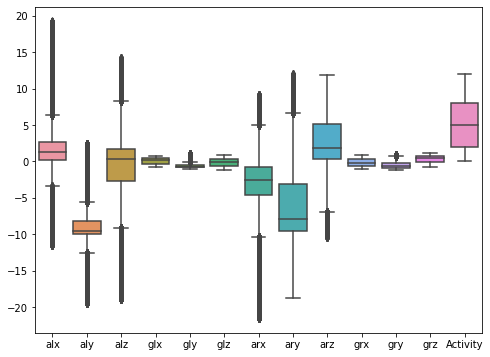

In [118]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1)
plt.show()